# A brief Recap on ecurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM)

Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) units are fundamental architectures in the field of deep learning, particularly for processing sequential data. Here's a brief overview of their key characteristics and differences:

## 1. RNNs:

Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or numerical time series data from market indicators, sensors, and more. Unlike feedforward neural networks, RNNs have a unique feature called *memory* that captures information about what has been calculated so far. In essence, RNNs process sequences by iterating through the elements and maintaining a state that encapsulates information relative to what it has seen so far.

The core idea behind RNNs is captured by the following update equation:

$$
h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)
$$

where:
- $h_t$ is the hidden state at time $t$,
- $x_t$ is the input at time $t$,
- $W_{xh}$ is the weight matrix for inputs to hidden state,
- $W_{hh}$ is the weight matrix for hidden state to hidden state,
- $b_h$ is the hidden bias,
- $\sigma$ denotes the activation function, typically a nonlinearity such as tanh or ReLU.

The output at each step $t$ is computed as:

$$
y_t = \sigma(W_{hy}h_t + b_y)
$$

where $W_{hy}$ is the weight matrix for hidden state to output, and $b_y$ is the output bias.

![RNN](figures/RNN.png "Recurrent Neural Network")

This looping mechanism enables RNNs to process inputs of any length, which makes them particularly suited for tasks like language modeling where the input is a sequence of words. Despite their power, RNNs are notoriously difficult to train effectively due to issues like vanishing and exploding gradients. This has led to the development of more sophisticated variants, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), which are designed to mitigate these issues and better capture long-range dependencies.


1. **Sequential Data Processing**: RNNs are designed to handle sequences of data, making them ideal for tasks like language modeling and time series analysis.
2. **Memory Capability**: They have a form of memory that captures information about what has been processed so far by looping the output back into the input.
3. **Vanishing Gradient Problem**: RNNs struggle with long sequences due to the vanishing gradient problem, where the contribution of information decays over time.
4. **Simple Structure**: Consists of a simple layer that has recurrent connections, making them relatively easy to understand.



## 2. LSTMs:

5. **Advanced RNNs**: LSTMs are a type of RNN architecture designed to address the vanishing gradient problem.
6. **Long-Term Dependencies**: They are capable of learning long-term dependencies in sequence data.
7. **Cell State**: LSTMs maintain a cell state, along with input, output, and forget gates, allowing them to regulate the flow of information.
8. **Gates Mechanism**: These gates selectively allow information to enter, leave, or be forgotten by the cell, making LSTMs more flexible and powerful.
9. **Complexity**: Due to their complex architecture, LSTMs are more computationally intensive than basic RNNs.

![RNN vs LSTM](figures/LSTM3-chain.png "Recurrent Neural Network")

### A Detailed Walk-Through:

The key to LSTMs is the cell state, the horizontal line running through the top of the diagram.

The cell state is kind of like a conveyor belt. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

![RNN](figures/LSTM3-C-line.png "Recurrent Neural Network")



The LSTM does have the ability to remove or add information to the cell state, carefully regulated by structures called gates.

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

![RNN](figures/LSTM3-gate.png "Recurrent Neural Network")

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

An LSTM has three of these gates, to protect and control the cell state.


The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at ht−1
and $xt$, and outputs a number between 0
and 1 for each number in the cell state $C_{t−1}$. A 1 represents “completely keep this,” while a 0
represents “completely get rid of this.”

Let’s go back to our example of a language model trying to predict the next word based on all the previous ones. In such a problem, the cell state might include the gender of the present subject, so that the correct pronouns can be used. When we see a new subject, we want to forget the gender of the old subject.

![RNN](figures/LSTM3-focus-f.png "Recurrent Neural Network")

The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, $\tilde{C}_t$
, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

In the example of our language model, we’d want to add the gender of the new subject to the cell state, to replace the old one we’re forgetting.

![RNN](figures/LSTM3-focus-i.png "Recurrent Neural Network")

It’s now time to update the old cell state, $C_{t−1}$, into the new cell state $C_t$. 
The previous steps already decided what to do, we just need to actually do it.

We multiply the old state by $f_t$, forgetting the things we decided to forget earlier. Then we add $i_t∗\tilde{C̃}_t$. 
This is the new candidate values, scaled by how much we decided to update each state value.

In the case of the language model, this is where we’d actually drop the information about the old subject’s gender and add the new information, as we decided in the previous steps.

![RNN](figures/LSTM3-focus-C.png "Recurrent Neural Network")

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh
 (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

For the language model example, since it just saw a subject, it might want to output information relevant to a verb, in case that’s what is coming next. For example, it might output whether the subject is singular or plural, so that we know what form a verb should be conjugated into if that’s what follows next.

![RNN](figures/LSTM3-focus-o.png "Recurrent Neural Network")




## Differences of RNN and LSTM:

10. **Handling Long Sequences**: Unlike RNNs, LSTMs can efficiently process long sequences without losing significant information over time.
11. **Architecture Complexity**: LSTMs have a more complex architecture with multiple gates, while RNNs have a simpler, looped structure.
12. **Memory Management**: LSTMs manage memory more effectively through their cell state and gates, addressing the limitations of traditional RNNs.
13. **Computational Resources**: The complex structure of LSTMs requires more computational resources compared to RNNs.
14. **Application**: While both are used for sequential data, LSTMs are preferred for tasks requiring learning from long sequences.
15. **Innovation Timeline**: RNNs were developed first, with LSTMs later introduced as an enhancement to overcome RNNs' shortcomings.


# Example: Weather data time series

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## The weather dataset
We consider here a <a href="https://www.bgc-jena.mpg.de/wetter/" class="external">[weather time series dataset</a> recorded by the <a href="https://www.bgc-jena.mpg.de" class="external">Max Planck Institute for Biogeochemistry</a>.

This dataset contains 14 different features such as air temperature, atmospheric pressure, and humidity. These were collected every 10 minutes, beginning in 2003. For efficiency, you will use only the data collected between 2009 and 2016. This section of the dataset was prepared by François Chollet for his book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)

Let us inspect again the data.

In [4]:
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

* An observation is recorded every 10 minutes. This means that, for a single hour, you will have 6 observations. 
* A single day will contain 144 (6x24) observations. 

* Given a specific time, let's say you want to predict the temperature 6 hours in the future. In order to make this prediction, you choose to use 5 days of observations. 

* Thus, you would create a window containing the last 720(5x144) observations to train the model. Many such configurations are possible, making this dataset a good one to experiment with.

* The function below returns the above described windows of time for the model to train on. The parameter `history_size` is the size of the past window of information. The `target_size` is how far in the future does the model need to learn to predict. The `target_size` is the label that needs to be predicted.

In [5]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

* The first 300,000 rows of the data will be the training dataset, and there remaining will be the validation dataset. 

* This amounts to ~2100 days worth of training data.

In [6]:
TRAIN_SPLIT = 300000

Setting seed to ensure reproducibility.

In [7]:
tf.random.set_seed(13)

## Task: Forecast a univariate time series

* You are supposed train a model using only a single feature (temperature), and use it to make predictions for that value in the future.

* To this end, let us first extract only the temperature from the dataset.

In [8]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

Now, let us observe how this data looks across time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd63137b048>],
      dtype=object)

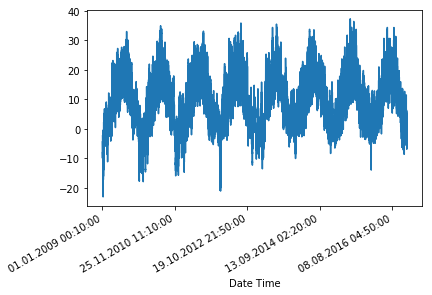

In [9]:
uni_data.plot(subplots=True)

In [10]:
uni_data = uni_data.values

## Standardization

* As in the previous examples, we carry out again by scaling by subtracting the mean and dividing by the standard deviation of each feature.

* You could also use a `tf.keras.utils.normalize` method that rescales the values into a range of [0,1].

Note: The mean and standard deviation should only be computed using the training data.

In [11]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

Let's standardize the data.

In [12]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

* Next, let us create the data for the univariate model. 

* The model will be given the last 20 recorded temperature observations, and needs to learn to predict the temperature at the next time step. 

In [13]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

This is what the `univariate_data` function returns.

In [14]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
-2.1041848598100876


Now that the data has been created, let's take a look at a single example. The information given to the network is given in blue, and it must predict the value at the red cross.

In [15]:
def create_time_steps(length):
  return list(range(-length, 0))

In [16]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

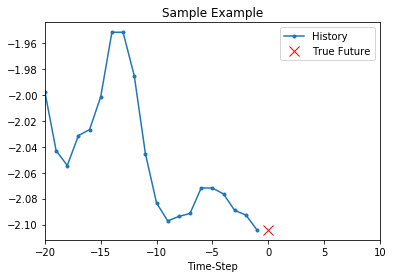

In [17]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

### Task
- Given this data set, add a RNN as shown before in the class to make predictions for the time series for multiple time horizons.